# Exemple avec Iris
## supervisé

In [1]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%


## scikit-learn non supervisé

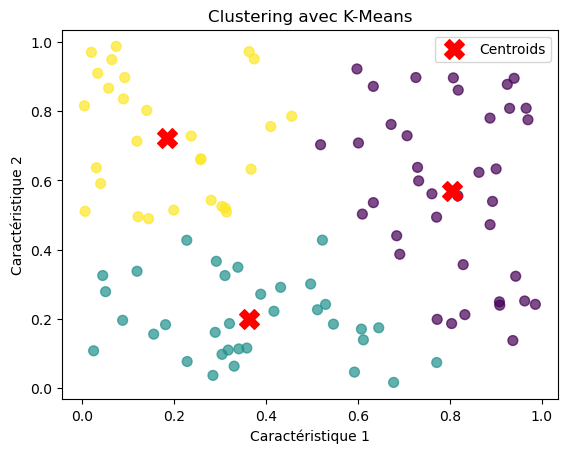

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Génération de données aléatoires (non étiquetées)
np.random.seed(42)
data = np.random.rand(100, 2)  # 100 points avec 2 caractéristiques

# Création et entraînement du modèle K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters
kmeans.fit(data)

# Récupération des résultats
labels = kmeans.labels_  # Les clusters attribués à chaque point
centroids = kmeans.cluster_centers_  # Les centres des clusters

# Visualisation des clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("Clustering avec K-Means")
plt.xlabel("Caractéristique 1")
plt.ylabel("Caractéristique 2")
plt.legend()
plt.show()


# Données ASTEP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('dataset.csv')
df

_name planet_status       mass    radius  orbital_period  \
0             earth           NaN   0.003147  0.089833      365.250000   
1     Kepler-1081 b     Confirmed        NaN  0.090000        3.856919   
2      Kepler-398 c     Confirmed        NaN  0.090000       11.419412   
3     Kepler-1278 b     Confirmed        NaN  0.090000        3.239413   
4      Kepler-595 c     Confirmed   0.010380  0.090000       12.386020   
...             ...           ...        ...       ...             ...   
4691      ups And b     Confirmed   0.620000       NaN        4.617110   
4692      ups And c     Confirmed   9.100000       NaN      240.937000   
4693      ups And d     Confirmed  23.580000       NaN     1281.439000   
4694      ups And e     Confirmed        NaN       NaN     3848.860000   
4695      zet Del B     Confirmed  40.000000       NaN             NaN   

      semi_major_axis  eccentricity       IST  
0              1.0000       0.01670  1.000000  
1                 NaN           NaN  0.999071  
2              0.0870           NaN  0.999071  
3                 NaN           NaN  0.999071  
4                 NaN           NaN  0.999071  
...               ...           ...       ...  
4691           0.0590       0.01186       NaN  
4692           0.8610       0.24450       NaN  
4693           2.5500       0.31600       NaN  
4694           5.2456       0.00536       NaN  
4695         907.0000           NaN       NaN  

[4696 rows x 8 columns]

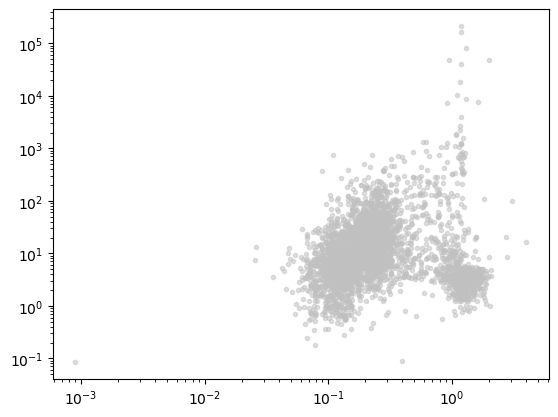

In [2]:
axes = plt.gca()
"""nuage de points df issu de la BDD
"""
x = df['radius']
y = df['orbital_period']
z = df['_name']
plt.scatter(x,y,color='silver',marker='.',alpha=0.5)

plt.xscale('log')
plt.yscale('log')

plt.show()

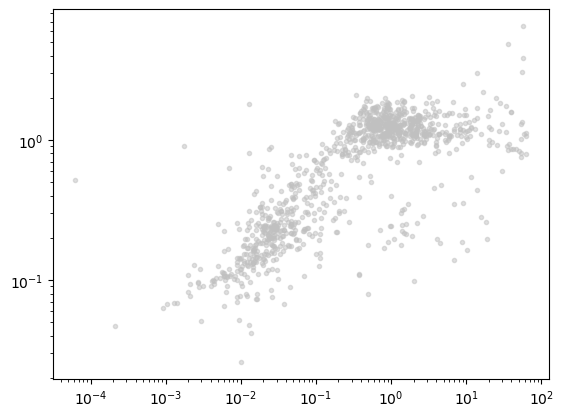

In [3]:
axes = plt.gca()
"""nuage de points df issu de la BDD
"""
x = df['mass']
y = df['radius']
z = df['_name']
plt.scatter(x,y,color='silver',marker='.',alpha=0.5)

plt.xscale('log')
plt.yscale('log')

plt.show()

## sk-learn non supervisé

In [4]:
df_reduit = df[['mass','radius','_name']]
df_reduit = df_reduit.dropna()
x = np.log(df_reduit['mass'])
y = np.log(df_reduit['radius'])

L = []
for x, y in zip(x, y):
    L.append([x,y])

L[:10]

[[-5.761407122499511, -2.409803828596342],
 [-4.567874401244395, -2.4079456086518722],
 [-5.0206856299497575, -2.4079456086518722],
 [-5.506572305368496, -2.406835114367845],
 [-5.8781358618009785, -2.419118909249997],
 [-3.101092789211817, -2.419118909249997],
 [-6.16581793425276, -2.372685720673535],
 [-5.4398809308698235, -2.3622289459215606],
 [-5.910806644090528, -2.3580978029243043],
 [-3.669469060594113, -2.4651040224918206]]

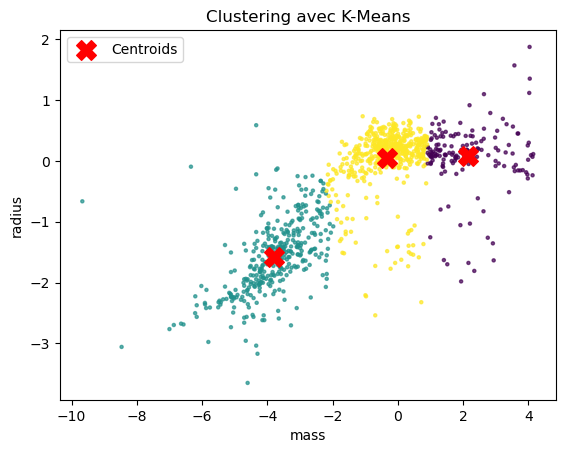

In [5]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# données (non étiquetées)

data = np.array(L)  

# Création et entraînement du modèle K-Means
kmeans = KMeans(n_clusters=3, random_state=50)  # 3 clusters
kmeans.fit(data)

# Récupération des résultats
labels = kmeans.labels_  # Les clusters attribués à chaque point
centroids = kmeans.cluster_centers_  # Les centres des clusters

# Visualisation des clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=5, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
#plt.xscale('log')
#plt.yscale('log')
plt.title("Clustering avec K-Means")
plt.xlabel('mass')
plt.ylabel('radius')
plt.legend()
plt.show()


In [22]:
data[:10]

array([[-5.76140712, -2.40980383],
       [-4.5678744 , -2.40794561],
       [-5.02068563, -2.40794561],
       [-5.50657231, -2.40683511],
       [-5.87813586, -2.41911891],
       [-3.10109279, -2.41911891],
       [-6.16581793, -2.37268572],
       [-5.43988093, -2.36222895],
       [-5.91080664, -2.3580978 ],
       [-3.66946906, -2.46510402]])

In [23]:
valeurs, comptes = np.unique(labels, return_counts=True)
valeurs,comptes

(array([0, 1, 2], dtype=int32), array([156, 381, 493]))

# Previsions sur les exoplanetes de TOI_270

In [24]:
names = ['TOI-270 d','TOI-270 b','TOI-270 c','earth']
df_p = df[df['_name'].isin(names)]
df_p

_name planet_status      mass    radius  orbital_period  \
0         earth           NaN  0.003147  0.089833      365.250000   
343   TOI-270 b     Confirmed  0.006000  0.111250        3.360080   
1434  TOI-270 d     Confirmed  0.017000  0.190000       11.380140   
1747  TOI-270 c     Confirmed  0.020800  0.215900        5.660172   

      semi_major_axis  eccentricity       IST  
0              1.0000        0.0167  1.000000  
343            0.0306        0.0000  0.893491  
1434           0.0733        0.0000  0.642047  
1747           0.0472        0.0000  0.587656

In [25]:
"""nuage de points df_p issu des observations
"""
x_p = np.log(df_p['mass'])
y_p = np.log(df_p['radius'])
z_p = df_p['_name']

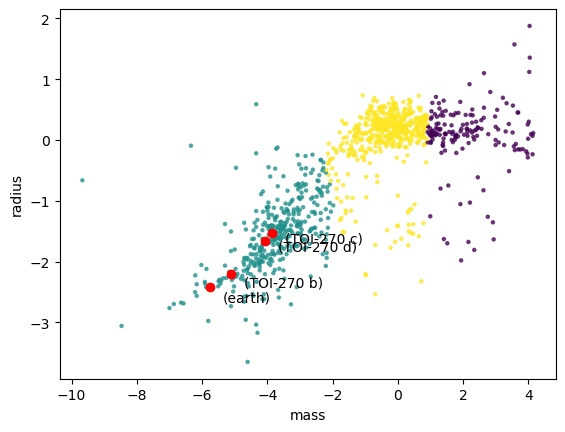

In [50]:
plt.clf()
axes = plt.gca()
# data et labels sont calculés plus haut 
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=5, alpha=0.7)
plt.scatter(x_p,y_p,color='red',marker='o')
for x0, y0, z0 in zip(x_p, y_p, z_p):
    axes.text(x0+0.4, y0*1.1, f"({z0})", fontsize=10)
plt.xlabel('mass')
plt.ylabel('radius')
plt.show()

In [29]:
Liste = []
for i,j,k in zip(x_p,y_p,z_p):
    Liste.append((i,j,k))
Liste = np.array(Liste)
Liste

array([['-5.761407122499511', '-2.409803828596342', 'earth'],
       ['-5.115995809754082', '-2.1959753579357875', 'TOI-270 b'],
       ['-4.074541934925921', '-1.6607312068216509', 'TOI-270 d'],
       ['-3.872802292274865', '-1.5329399414613754', 'TOI-270 c']],
      dtype='<U32')

In [35]:
# premiere colonne
Liste[:,0]

array(['-5.761407122499511', '-5.115995809754082', '-4.074541934925921',
       '-3.872802292274865'], dtype='<U32')

In [37]:
# 2e colonne
Liste[:,1]

array(['-2.409803828596342', '-2.1959753579357875', '-1.6607312068216509',
       '-1.5329399414613754'], dtype='<U32')

In [40]:
couples_xp_yp = Liste[:,:2]
couples_xp_yp

array([['-5.761407122499511', '-2.409803828596342'],
       ['-5.115995809754082', '-2.1959753579357875'],
       ['-4.074541934925921', '-1.6607312068216509'],
       ['-3.872802292274865', '-1.5329399414613754']], dtype='<U32')

In [43]:
kmeans.predict(couples_xp_yp)

array([1, 1, 1, 1], dtype=int32)

In [45]:
# Jupiter
kmeans.predict([[0,0]])

array([2], dtype=int32)